<a href="https://colab.research.google.com/github/JacobWilliams370/cs167_notes/blob/main/Project1_Williams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. 

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify). 

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')




Mounted at /content/drive


#1. Name: Jacob Williams

# 2. Data Description
Answer the following questions:
- Explain what dataset you chose, and why you chose it.

I decided to choose one of the datasets given to us above. The one I choose was the Admission to the University. I decided to do this dataset because I thought it would be fun and revelant to me. First, I was surprised to see that this dataset worked with graduate school admission opposed to undergraduate school adnission. Since I'm graduating in the spring, I thought it would be interesting to use a dataset that focuses on graduate school since there's always the possibility of me going back to get my MBA.
- Specify which columns you are using as your __predictor variables__

I decided to look at every predictor variable (GRE Score, TOEFL Score, University Rating, SOP, LOR, and CGPA) except Research, which indicates whether or not that student has had a research experience. I decided not to use this predictor variable because I wanted to how close we could get to predicting our target variable solely on a student's achievments in undergrad.
- What variable are you selecting as your __target variable__?

Our target variable is Chance of Admit, which is a student's chance of admission into graduate school. I picked this as my target variable because we are trying to predict a student's chance of admission into graduate school.
- In selecting this target variable, does this make your problem a __classification__ or a __regression__? 

Since our target variable, chance of admit, is continuous we will run a regression on our problem.

# 3. Research Question
As clearly/specifcially as possible, state the question you are trying to solve in this project.
> For example, if I was working with the Iris dataset, I might ask 'how accurately can we predict the species of Iris from these 4 measurements?'

**Research Question:** How close can we get to accurately predicting a student's chance of admission into graduate school using the following predictor followings that focus on an undergraduate student's college achievments: GRE Score, TOEFL Score, University Rating, SOP, LOR, and CGPA.

# 4. Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc). 

In [3]:
# data prep code 
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

admit = pd.read_csv('/content/drive/MyDrive/CS167/datasets/college_admin.csv')

predictors = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
target = "Chance of Admit "

train_data, test_data, train_sln, test_sln = train_test_split(admit[predictors], admit[target], test_size = 0.2, random_state=41)

train_data.shape
# (320, 6)
train_sln.shape
# (320,)
test_data.shape
# (80, 6)
test_sln.shape
# (80, )

train_data.head()



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
253,335,115,4,4.5,4.5,9.68
181,305,107,2,2.5,2.5,8.42
332,308,106,3,3.5,2.5,8.21
151,332,116,5,5.0,5.0,9.28
352,303,100,2,3.0,3.5,8.06


In [4]:
# data prep code 
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

# First we will check to see if there is any missing data in our dataset
admit.isna().any()
#Serial No.           False
#GRE Score            False
#TOEFL Score          False
#University Rating    False
#SOP                  False
#LOR                  False
#CGPA                 False
#Research             False
#Chance of Admit      False

# As we see above, our dataset does not have any missing data, so luckily we do not
# need to use any of the strategies learned throughout this course to fix it this.

# Normalizing data for later use
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
train_data_normalized

array([[ 1.5401845 ,  1.21779426,  0.81465924,  1.11474818,  1.17017532,
         1.77502916],
       [-1.00119934, -0.07365284, -0.94083542, -0.89777322, -1.08558433,
        -0.31409384],
       [-0.74706096, -0.23508373, -0.06308809,  0.10848748, -1.08558433,
        -0.66228101],
       ...,
       [ 0.52363096, -0.55794551, -0.06308809,  0.61161783,  0.60623541,
        -0.28093316],
       [-0.40820978, -0.39651462, -0.06308809, -1.40090357, -0.52164442,
        -0.97730749],
       [ 0.69305655, -0.07365284, -0.06308809, -0.39464287,  0.04229549,
         0.82994971]])

**Data Preparation:** When I start data cleaning, I always like to get a look at our data first. First, I looked to see if we had any missing data in our dataset using isna().any(), which will return false if that variable has any missing data and true is there is missing data. From the output above, we can see that this dataset does not have any missing data, so there is no further action needed here. Next, I needed to look into whether we needed any dummy variables. Since all of our predictor variables are numeric, there is no need for dummy variables in our experiment. Next, we split our data into training and test data using the train_test_split from sklearn with our 6 predictors variables. We then used the shape function on our train_data, test_data, train_sln, and test_sln to confirm that our train_test_split function worked. Lastly for our data prepation, I wanted to normalize our data that was split earlier for future use.

# 5. Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

Since our target variable is numerical, continuous, and we are running a regression there are three variables we can use which are mean average error, mean square error, and R^2. I generally prefer to use MSE over MAE because that's what I've used in my statistic and actuarial science classes before, but I also like the fact that it is harsher than MAE. For this experiment, we will use all three because I believe it's good to get a look at all of them.

# 6. Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

Some helpful links:
- [Sklearn Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

In [5]:
# build and test a baseline model here
dummy_regr = DummyRegressor() # will always predict the average of the target
dummy_regr.fit(train_data, train_sln)
preds = dummy_regr.predict(test_data)

print('R2: ', metrics.r2_score(test_sln, preds))
# R2:  -0.0014319593565470523 - as we can see our R2 score is particularly 0
print('MSE: ', metrics.mean_squared_error(test_sln, preds))
# MSE:  0.018368703125000004 - This is our average MSE from our dummy class, thus we should strive to get below this
print('MAE: ', metrics.mean_absolute_error(test_sln, preds))
# MAE:  0.11175000000000002 - This is our average MAE, thus we should strive to get below this


R2:  -0.0014319593565470523
MSE:  0.018368703125000004
MAE:  0.11175000000000002


**Baseline Peformance:** Above we used the DummyRegressor function from sklearn to create a baseline for our metrics. We used the default that will guess the average of our target variable. The baseline for our R^2 is -.001431, almost 0. The baseline for our MSE is .01836. The baseline for our MAE is .1118. We will strive to get above our baseline for R2 and lower than our baseline for MAE and MSE. One thing I would like to note is that our baseline for MSE is lower than our baseline for MAE, which in theory MSE should be higher than MAE.

# 7. Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one. Basically make your plan to test your research question and then test it.


In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# kNN non-normalized
kNN = neighbors.KNeighborsRegressor(n_neighbors=12)
kNN.fit(train_data, train_sln)
predictions_kNN = kNN.predict(test_data)

print('MAE: ', metrics.mean_absolute_error(test_sln, predictions_kNN))
print('MSE: ', metrics.mean_squared_error(test_sln, predictions_kNN))
print('R2: ', metrics.r2_score(test_sln, predictions_kNN))

MAE:  0.054325
MSE:  0.004974350000000001
R2:  0.7288064904132834


In [7]:
# kNN normalized
kNN_norm = neighbors.KNeighborsRegressor(n_neighbors=12)
kNN_norm.fit(train_data_normalized, train_sln)
predictions_kNN_norm = kNN_norm.predict(test_data_normalized)

print('MAE: ', metrics.mean_absolute_error(test_sln, predictions_kNN_norm))
print('MSE: ', metrics.mean_squared_error(test_sln, predictions_kNN_norm))
print('R2: ', metrics.r2_score(test_sln, predictions_kNN_norm))

MAE:  0.052000000000000005
MSE:  0.004342
R2:  0.7632811887733023


In [8]:
# w-kNN non-normalized
wkNN = neighbors.KNeighborsRegressor(n_neighbors=15, weights = 'distance')
wkNN.fit(train_data, train_sln)
predictions_wkNN = wkNN.predict(test_data)

print('MAE: ', metrics.mean_absolute_error(test_sln, predictions_wkNN))
print('MSE: ', metrics.mean_squared_error(test_sln, predictions_wkNN))
print('R2: ', metrics.r2_score(test_sln, predictions_wkNN))

MAE:  0.05314853466267792
MSE:  0.00481069915358952
R2:  0.7377284696437144


In [9]:
# w-kNN normalized
wkNN_norm = neighbors.KNeighborsRegressor(n_neighbors=15, weights = 'distance')
wkNN_norm.fit(train_data_normalized, train_sln)
predictions_wkNN_norm = wkNN_norm.predict(test_data_normalized)

print('MAE: ', metrics.mean_absolute_error(test_sln, predictions_wkNN_norm))
print('MSE: ', metrics.mean_squared_error(test_sln, predictions_wkNN_norm))
print('R2: ', metrics.r2_score(test_sln, predictions_wkNN_norm))

MAE:  0.05115368902972241
MSE:  0.004254353953169408
R2:  0.768059509366222


In [97]:
# Decision tree non-normalized
dtree = tree.DecisionTreeRegressor(max_features=5,max_depth=4)
dtree.fit(train_data, train_sln)
predictions_dtree = dtree.predict(test_data)

print('MAE: ', metrics.mean_absolute_error(test_sln, predictions_dtree))
print('MSE: ', metrics.mean_squared_error(test_sln, predictions_dtree))
print('R2: ', metrics.r2_score(test_sln, predictions_dtree))

MAE:  0.05780159566160707
MSE:  0.005673683382722781
R2:  0.6906799664590498


In [103]:
# Decision tree normalized
dtree_norm = tree.DecisionTreeRegressor(max_features=5,max_depth=4)
dtree_norm.fit(train_data_normalized, train_sln)
predictions_dtree_norm = dtree_norm.predict(test_data_normalized)

print('MAE: ', metrics.mean_absolute_error(test_sln, predictions_dtree_norm))
print('MSE: ', metrics.mean_squared_error(test_sln, predictions_dtree_norm))
print('R2: ', metrics.r2_score(test_sln, predictions_dtree_norm))

MAE:  0.057471676103764004
MSE:  0.005583740752071955
R2:  0.6955834930841686


In [81]:
# Random Forest non-normalized
rforest = RandomForestRegressor(n_estimators=41,  max_depth=4)
rforest.fit(train_data,train_sln)
predictions_rforest = rforest.predict(test_data)

print('MAE: ', metrics.mean_absolute_error(test_sln, predictions_rforest))
print('MSE: ', metrics.mean_squared_error(test_sln, predictions_rforest))
print('R2: ', metrics.r2_score(test_sln, predictions_rforest))

MAE:  0.05401994423503551
MSE:  0.005230620757590466
R2:  0.7148350235572307


In [85]:
# Random Forest normalized
rforest_norm = RandomForestRegressor(n_estimators=41,  max_depth=4)
rforest_norm.fit(train_data_normalized,train_sln)
predictions_rforest_norm = rforest_norm.predict(test_data_normalized)

print('MAE: ', metrics.mean_absolute_error(test_sln, predictions_rforest_norm))
print('MSE: ', metrics.mean_squared_error(test_sln, predictions_rforest_norm))
print('R2: ', metrics.r2_score(test_sln, predictions_rforest_norm))

MAE:  0.05176272780615106
MSE:  0.004695300238811048
R2:  0.7440198316711697


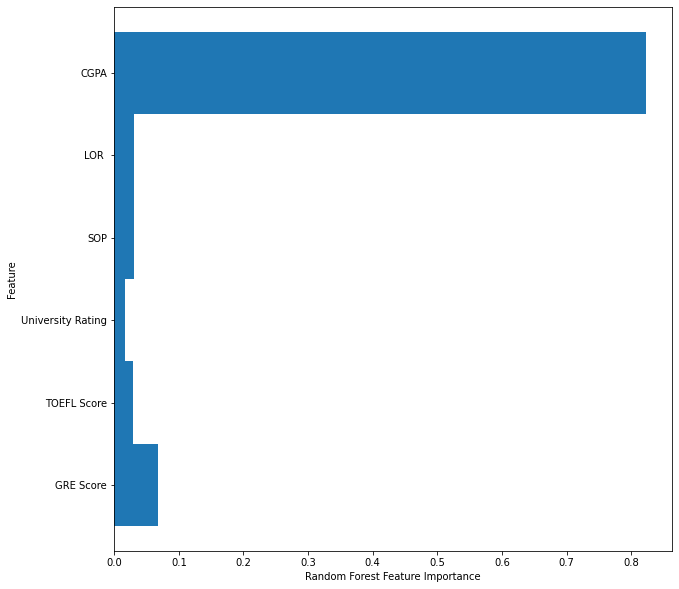

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(10,10)) #making the table a bit bigger so the text is readable
plt.barh(index,rforest.feature_importances_,height=1.0) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

From our features importance plot, we can see that by far the most important variable was CGPA and the rest of our variables aren't really as important.

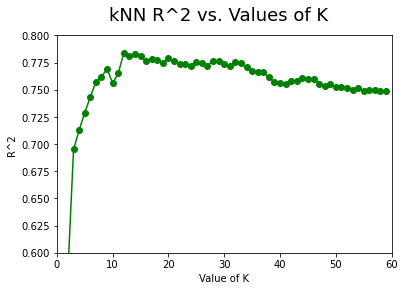

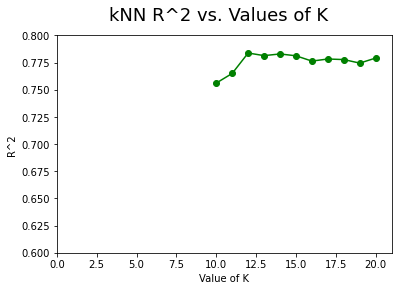

In [62]:
import matplotlib.pyplot as plt

def tune_k(k_vals):
    kNN_rscore = []

    for n in k_vals:
        tkNN = neighbors.KNeighborsRegressor(n_neighbors=n)
        tkNN.fit(train_data, train_sln)
        predictions_tkNN = tkNN.predict(test_data)
        curr_rscore = metrics.r2_score(test_sln,predictions_tkNN)
        kNN_rscore.append(curr_rscore)

    plt.suptitle('kNN R^2 vs. Values of K',fontsize=18)
    plt.xlabel('Value of K')
    plt.ylabel('R^2')
    plt.plot(k_vals,kNN_rscore,'go-')
    plt.axis([0,k_vals[-1]+1,.6,.8])

    plt.show()
    
tune_k(range(1,60))
tune_k(range(10,21))
# K = 12 appears to be value that gives us the highest R^2

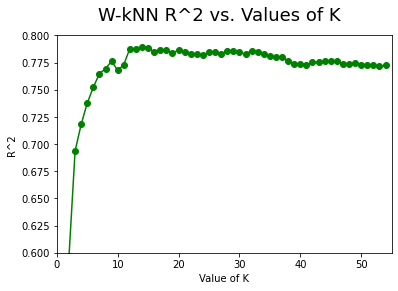

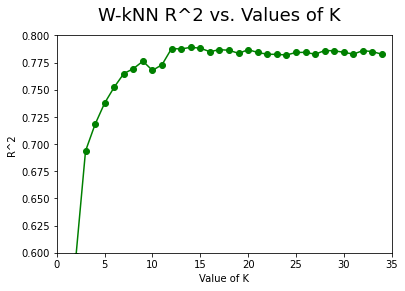

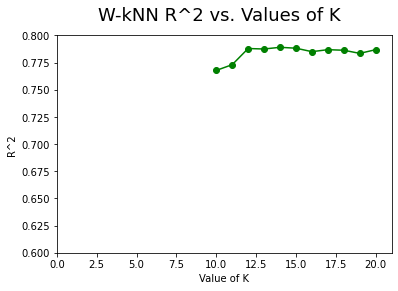

In [68]:
import matplotlib.pyplot as plt

def tune_wk(k_vals):
    wkNN_rscore = []

    for n in k_vals:
        w_tkNN = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
        w_tkNN.fit(train_data, train_sln)
        predictions_wtkNN = w_tkNN.predict(test_data)
        curr_rscore = metrics.r2_score(test_sln,predictions_wtkNN)
        wkNN_rscore.append(curr_rscore)

    plt.suptitle('W-kNN R^2 vs. Values of K',fontsize=18)
    plt.xlabel('Value of K')
    plt.ylabel('R^2')
    plt.plot(k_vals,wkNN_rscore,'go-')
    plt.axis([0,k_vals[-1]+1,.6,.8])

    plt.show()

tune_wk(range(1,55))
tune_wk(range(1,35))
tune_wk(range(10,21))

# K = 15 appears to be value that gives us the highest R^2

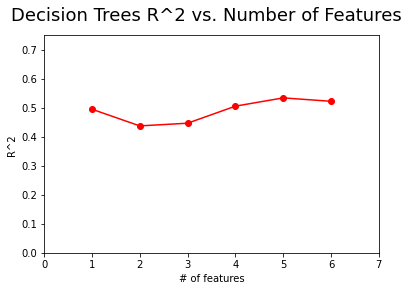

In [91]:
import matplotlib.pyplot as plt

def tune_dt_features(n_estimator_values):
    dt_rscore = []

    for n in n_estimator_values:

        dt = tree.DecisionTreeRegressor(max_features=n, random_state=41)
        dt.fit(train_data, train_sln)
        predictions_dt = dt.predict(test_data)
        curr_rscore = metrics.r2_score(test_sln,predictions_dt)
        dt_rscore.append(curr_rscore)

    plt.suptitle('Decision Trees R^2 vs. Number of Features',fontsize=18)
    plt.xlabel('# of features')
    plt.ylabel('R^2')
    plt.plot(n_estimator_values,dt_rscore,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.0,.75])

    plt.show()
    
tune_dt_features(range(1,7))
# Looks like we should try 5 or 6

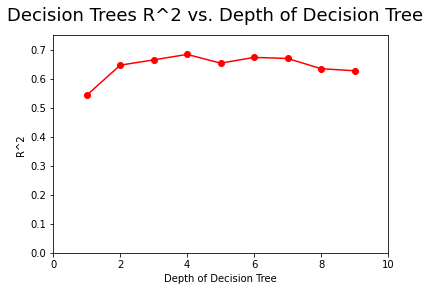

In [93]:
import matplotlib.pyplot as plt

def tune_dt_depth(n_estimator_values):
    dt_rscore = []

    for n in n_estimator_values:

        dt = tree.DecisionTreeRegressor(max_depth=n, random_state=41)
        dt.fit(train_data, train_sln)
        predictions_dt = dt.predict(test_data)
        curr_rscore = metrics.r2_score(test_sln,predictions_dt)
        dt_rscore.append(curr_rscore)

    plt.suptitle('Decision Trees R^2 vs. Depth of Decision Tree',fontsize=18)
    plt.xlabel('Depth of Decision Tree')
    plt.ylabel('R^2')
    plt.plot(n_estimator_values,dt_rscore,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.0,.75])

    plt.show()
    
tune_dt_depth(range(1,10))
# Looks like a we should try a depth between 4 and 7

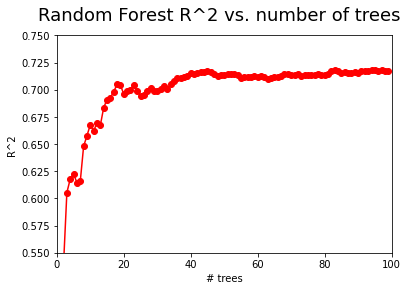

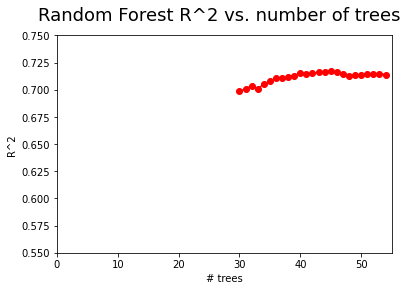

In [72]:
import matplotlib.pyplot as plt

def tune_number_of_trees(n_estimator_values):
    rf_rscore = []

    for n in n_estimator_values:

        curr_rf = RandomForestRegressor(n_estimators=n, random_state = 41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_rscore = metrics.r2_score(test_sln,curr_predictions)
        rf_rscore.append(curr_rscore)

    plt.suptitle('Random Forest R^2 vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('R^2')
    plt.plot(n_estimator_values,rf_rscore,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.55,.75])

    plt.show()
    
tune_number_of_trees(range(1,100))

# After running this graph, it looks like our R^2 value decreases after 60, so we will rerun from 1 - 60 to get a better looking graph
tune_number_of_trees(range(30,55))
# It looks like 41 trees gives us our best R^2 value so we will use that


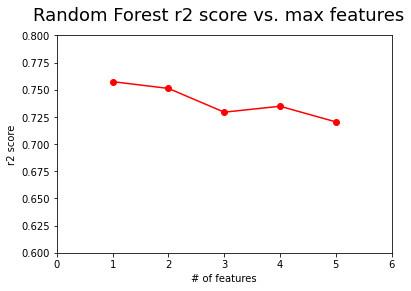

[0.7574153176206816, 0.7511985457221814, 0.7293469856446286, 0.7347954981446714, 0.7204188102044784]


In [109]:
import matplotlib.pyplot as plt

def tune_max_features(max_features_values):
    rf_r2_scores = []

    for m in max_features_values:

        curr_rf = RandomForestRegressor(max_features=m,random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_r2_score = metrics.r2_score(test_sln,curr_predictions)
        rf_r2_scores.append(curr_r2_score)


    plt.suptitle('Random Forest r2 score vs. max features',fontsize=18)
    plt.xlabel('# of features')
    plt.ylabel('r2 score')
    plt.plot(max_features_values,rf_r2_scores,'ro-')
    plt.axis([0,max_features_values[-1]+1,.6,.8])

    plt.show()
    print(rf_r2_scores)
    
tune_max_features(range(1,6))
# Looks like 1 features gives us the best R^2, but we don't lose much with 2. I will test both to see if we can get a better R^2 with 1 
# or 2 features

**Model Planning and Execution:** I tried four models: kNN, w-kNN, decision trees, and random forests. I also tried normalized versions for each of these four predictive models. For kNN and w-kNN, I tuned k (n_neighbors. For decision trees, I tuned the depth of the tree and the number of features in the decision tree. For random forests, I tuned the number of trees in the random and the number of features in the random forest. Below in the results table, you can see the values for which I choose to tune the paramters to for our models along with their metrics.

# 8. Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune. 

You should be able to fill in this table (but it doesn't count as a visualization): 

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           | MAE: .05433, MSE: .004974, R^2: 72.88%                   |  MAE: .052, MSE: .004342, R^2: 76.833%                |   k = 12                  |
| w-kNN         |  MAE: .05315, MSE: .004811, R^2: 73.77%                    |  MAE: .05115, MSE: .004254, R^2: 76.81%                |   k = 15                 |
| decision tree | MAE: .05780, MSE: .005674, R^2: 69.07%                     |MAE: .05447, MSE: .005584, R^2: 69.56%                  |   max_features = 5 and max_depth = 4                 |
| random forest | MAE: .05402, MSE: .005231, R^2: 71.48%                     | MAE: .05176, MSE: .004695, R^2: 74.4%                 |   n_estimators(number of trees) = 41 and max_features = 4                 |

Above I have included the parameters I tuned for my four predictive models: kNN, w-kNN, decision trees, and random forests.I also included the three metrics I used to determine the effectiveness of my 8 predictive models shown above using MAE, MSE, and R^2. I decided to write a function for all four of these predictive models that would produce a graph that I could interpret to determine how to tune my models. I also choose R^2 for my tuning graphs instead of MSE and MAE because it is more interpretable than MSE and MAE.

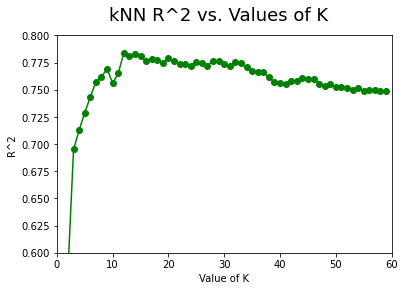

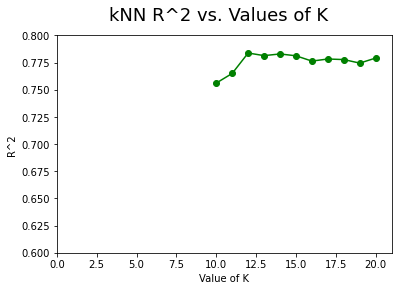

In [107]:
# When tuning my kNN model, I thought the most important and logical parameter to tune would be k.
# I started with a large range of k from 1 to 60 and then narrowed it down to 10 through 21 to 
# get a closer look at which k value to choose. From the graph below, we can see that k = 12
# has the highest R^2 value for kNN, thus I decided to use k = 12 has my paramater n_neighbors.

tune_k(range(1,60))
tune_k(range(10,21))
# K = 12 appears to be value that gives us the highest R^2


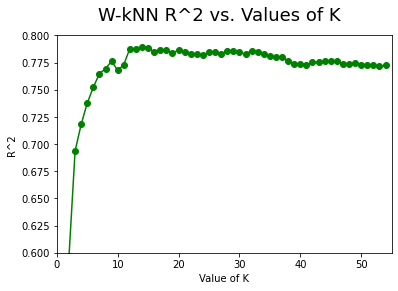

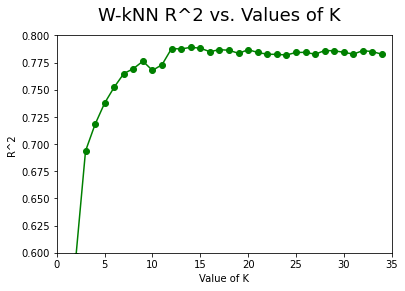

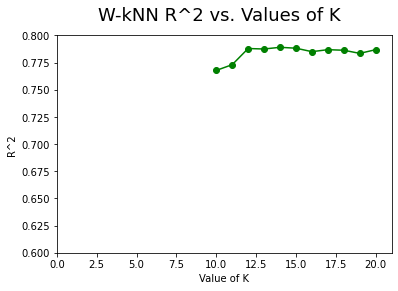

In [106]:
# For w-kNN, I used a similar strategy to kNN. I first created a function to display a graph so I could tune 
# my model. I then started with a large range of k to eventually narrow it down to 10 through 21. 
# I choose k = 15 because it had the highest R^2 value and this became my value for n_neighbors parameter.

tune_wk(range(1,55))
tune_wk(range(1,35))
tune_wk(range(10,21))

# K = 15 appears to be value that gives us the highest R^2

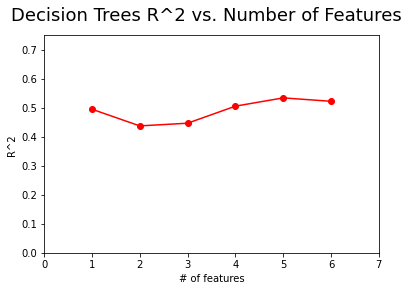

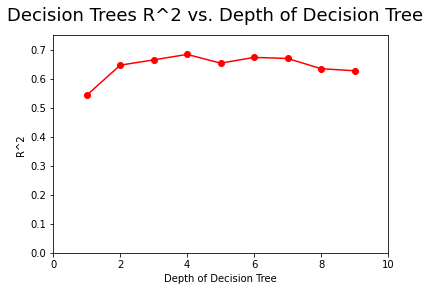

In [105]:
# For my decision tree models, I decided that the most appropriorate parameters would be depth of the tree
# and the number of features to include in the model. Below you can see graphs for both functions I created.
# They weren't as easy to interpret because they have similar R^2 values. For number features, I decided to
# test features 5 tough 6 and 5 gave us the best R^2, so we went with that. For max depth, I tested 4 through 7, 
# but 4 gave us the highest R^2, so I used that as our parameter.

tune_dt_features(range(1,7))
tune_dt_depth(range(1,10))


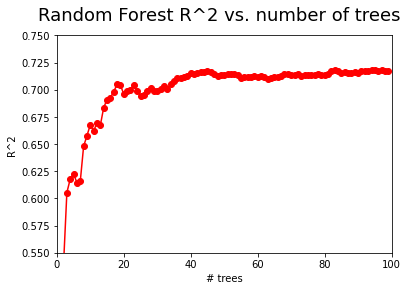

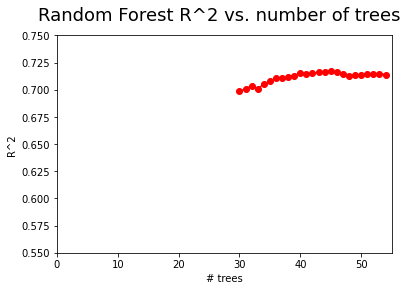

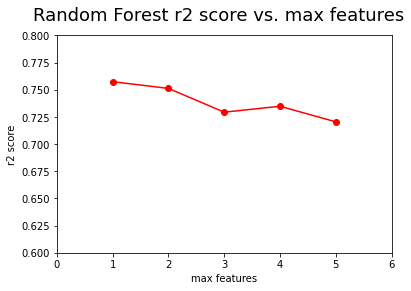

[0.7574153176206816, 0.7511985457221814, 0.7293469856446286, 0.7347954981446714, 0.7204188102044784]


In [108]:
# For my random forests, I decided the best parameters to tune would be the number of trees and 
# the max number of features in our model. For my number of trees tuning, I started with 1 through 100
# (our default) and then narrowed it down to 30 through 55. As seen below in our second graph for number 
# of trees, I found 41 to have the highest R^2, so I used that for my tuning. For the max features, I
# started with testing 1, since that had the highest R^2 value, but that lowered our overall R^2 value.
# To fix this, I added another feature (or variable) until our R^2 which was 4.
tune_number_of_trees(range(1,100))
tune_number_of_trees(range(30,55))
tune_max_features(range(1,6))

# 9. Bumps in the Road:
I've always found that I learn the most from these kinds of projects, and from where I get stuck. Keep track of these moments that you get stuck and chronicle them here: 

**What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?**

The first challenge I encounted was that one of my predictors, LOR, and my target variable, Chance of Admit, were not being recognized when I was splitting my data into training and testing data. I was very confused because I had already checked to see if there was any missing data and there wasn't, so from there I had to troubleshoot. I checked the names of my predictors in the dataset, and there was a space after LOR and Chance of Admit. To fix this, I simply added a space after the variable name to be able to split the data into training and testing. The way I adapted is to make sure I was paying attention to syntax to avoid making simple errors that can be time consuming to debug.


Another challenge I encounted was making my parameter graphs to tune my predicative models. I struggled to build these graphs at first because I was trying to build them from stratch like we did in notebook 3, but when that wasn't quite working because it was too time consuming I remembered you said sklearn's package would be very helpful. I use the tuning graphs for random forests as a guide to build tuning graphs from kNN, w-kNN, and decision trees. My functions worked, but for some reason the graph was blank and for an hour or so I could not figure out my mistake. I must admit it was a stupid one, but I had forgotten to change the axis to reflect my R^2 value. After I did this all my graphs worked and I was able to see what how I should tune.

These were the main two problems that I had throughout the course of this project. I think where I learned the most was debugging. I have decent experience in coding for statistics, but this doesn't really come with a lot of debugging because the code doesn't change in R (which is what I have used in the past). It was fun and frustrating to debug some of the problems in python. I think it strengthened my problem solving abilities and will help me debug in the future even if these were simple or easy errors to fix.


# 10. Conclusions

You don't necessarily have to answer all of these questions, but include a discussion of what you learned from this project. Discussions may include: 
- **What insights/recommendations do you have?**

Overall, I believe that all of my models work very well with an R^2 of 70% or above, which in statistics we can say that this is a strong R^2 value for our model. For our MAE and MSE, they are all well below the average we predicted using our dummy regressor function, which is great. Our MAE and MSE are also very low, which is another good indictator. I also recommend that if you are trying to go to graduate school after college that you do your best in all six of the predictor variables we examined. We saw from our random forest that using just 1 predictor actually made our model worse, thus all six predictors pay a role in graudate school admission.
- **What did you find that was interesting?**

I thought it was interesting how my variable importance plot showed that college GPA (CGPA) was the only relative important variable. I thought there would a more even spread among the six predictors.

-** Which model was your best model, which models didn't work well?**

Personally, I like my w-kNN (non-normalized) and random forests (non-normalized) the best. I like two because they have very similar metrics. The reason I didn't choose the normalized models is that the metrics were only slightly better and I didn't want to lose interpretibility of these models.

- **Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.**

First, I think the w-kNN performed better than the kNN because GRE Score and TOEFL Score were in the hundreds and had much more weight than my other 4 predictors. Adding a weight helped even out the predictors and give us a better model. I think w-kNN also worked because for graudate school if you tend to have better similar test scores, letters of recommendation, etc. as those around you, then you will probably have the same chance of admission.

I think my random forest model peformed well because it creates a bunch of decision trees that are uncorrelated and makes the most frequent prediction. In our case, the power of the audience would make sense. Graduate admission can be handled through a variety of people, so if the majority like your scores and experience then you have a better chance of admission. 

Ultimately, w-kNN (non-normalized) and random forests (non-normalized) are my favorite models for great metrics and interpretibility. One thing I would like to note is that for future research I would like to go back and back in research experience to see if it would make our model better.